In [1]:
gps_log_folder = 'A:/Zhao/job/14023_Aurizon/WASW/nmea2shp/log/'
output_folder = 'A:/Zhao/job/14023_Aurizon/WASW/nmea2shp/shp/'


import os, time, pynmea2, pandas, shapely
from geopandas import GeoDataFrame
start = time.time()

log_file_list = os.listdir(gps_log_folder)
log_file_list = ['Bunbury2Picton.nmea']

print('total GPS log files: ', len(log_file_list))

labels = ['DateTime', 'Latitude', 'Longitude', 'Altitude']
crs = {'init': 'epsg:4326'} # WGS84 Latitude/Longitude

total GPS log files:  1


In [8]:
for log_file in log_file_list:
    record_list = []
    print(log_file)
    fin = open(gps_log_folder + log_file, encoding='utf8')
    for line in fin:
        
        if line[:6]=='$GPGGA':
            try:
                #print(line)
                msg = pynmea2.parse(line)
                record_list.append((msg.timestamp,msg.latitude,msg.longitude,msg.altitude))
                #record_list.append((str(msg.timestamp)[:8],msg.latitude,msg.longitude,msg.altitude)) #convert timestamp to str
            except:
                pass
        
        #print(msg.timestamp,msg.altitude,msg.altitude_units,msg.latitude,msg.longitude)

    df = pandas.DataFrame(record_list,columns=labels)
    df = df.drop_duplicates(subset='DateTime')
    gdf = GeoDataFrame(df, crs=crs, geometry=[shapely.geometry.Point(xy) for xy in zip(df.Longitude, df.Latitude)])
    print(gdf.head(10))
    #print(gdf.dtypes)
    #gdf.to_file(output_folder + log_file + '.shp')

end = time.time()
print('Completed computing in: ', round(end-start, 2),'s')

Bunbury2Picton.nmea
          DateTime   Latitude   Longitude  Altitude  \
0  00:44:43.590000 -33.320675  115.673905      -4.1   
1  00:44:43.690000 -33.320675  115.673905      -4.1   
2  00:44:43.890000 -33.320675  115.673906      -4.0   
3  00:44:43.990000 -33.320674  115.673906      -4.0   
4  00:44:44.090000 -33.320674  115.673906      -3.9   
5  00:44:44.190000 -33.320674  115.673906      -3.9   
6  00:44:44.290000 -33.320674  115.673906      -3.9   
7  00:44:44.390000 -33.320674  115.673906      -3.9   
8  00:44:44.590000 -33.320674  115.673906      -3.8   
9  00:44:44.690000 -33.320674  115.673906      -3.8   

                                       geometry  
0  POINT (115.6739053666667 -33.32067488333333)  
1       POINT (115.67390545 -33.32067478333333)  
2  POINT (115.6739056166667 -33.32067456666667)  
3        POINT (115.6739057 -33.32067446666667)  
4        POINT (115.6739057833333 -33.32067435)  
5  POINT (115.6739058666667 -33.32067423333334)  
6       POINT (115.67390

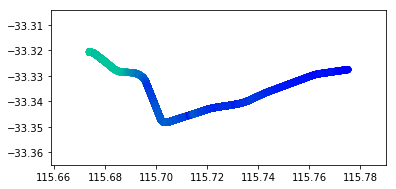

In [24]:
import matplotlib.pylab as plt
plt.figure(figsize=(500,300))
mycmap='winter_r'

gdf.plot(column='Altitude',cmap=mycmap)
plt.show()